In [49]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pickle
import cv2
import numpy as np
np.random.seed(0)
import itertools
import tensorflow as tf
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras import callbacks 
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [40]:
train_data = 'C://Users//SHIVAM//Downloads//Plant Disease Dataset//New Plant Diseases Dataset(Augmented)//New Plant Diseases Dataset(Augmented)//train'
valid_data = 'C://Users//SHIVAM//Downloads//Plant Disease Dataset//New Plant Diseases Dataset(Augmented)//New Plant Diseases Dataset(Augmented)//valid'

In [41]:

# Define data generators with data augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)



In [42]:
train_gen = train_datagen.flow_from_directory(
    train_data,
    target_size=(256, 256),
    batch_size=64,
    class_mode='sparse'
)
test_gen = test_datagen.flow_from_directory(
    valid_data,
    target_size=(256, 256),
    batch_size=64,
    class_mode='sparse'
)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [18]:
# Define model with regularization and transfer learning
base_model = keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3)
)

for layer in base_model.layers[:-4]:
    layer.trainable = False

model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(38, activation='softmax')
])

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 38)                38950     
                                                           

In [20]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='C://Users//SHIVAM//Final_Project//models.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history = model.fit(train_gen, validation_data=test_gen, epochs=25, callbacks=my_callbacks)


Epoch 1/25
1099/1099 [==============================] - 1679s 2s/step - loss: 0.6708 - accuracy: 0.8098 - val_loss: 0.2524 - val_accuracy: 0.9167
Epoch 2/25
1099/1099 [==============================] - 1248s 1s/step - loss: 0.2485 - accuracy: 0.9202 - val_loss: 0.1794 - val_accuracy: 0.9400
Epoch 3/25
1099/1099 [==============================] - 1255s 1s/step - loss: 0.1864 - accuracy: 0.9401 - val_loss: 0.1440 - val_accuracy: 0.9518
Epoch 4/25
1099/1099 [==============================] - 1264s 1s/step - loss: 0.1526 - accuracy: 0.9493 - val_loss: 0.1296 - val_accuracy: 0.9563
Epoch 5/25
1099/1099 [==============================] - 1271s 1s/step - loss: 0.1323 - accuracy: 0.9559 - val_loss: 0.1156 - val_accuracy: 0.9599
Epoch 6/25
1099/1099 [==============================] - 1259s 1s/step - loss: 0.1195 - accuracy: 0.9597 - val_loss: 0.1099 - val_accuracy: 0.9620
Epoch 7/25
1099/1099 [==============================] - 1228s 1s/step - loss: 0.1049 - accuracy: 0.9650 - val_loss: 0.1006 -

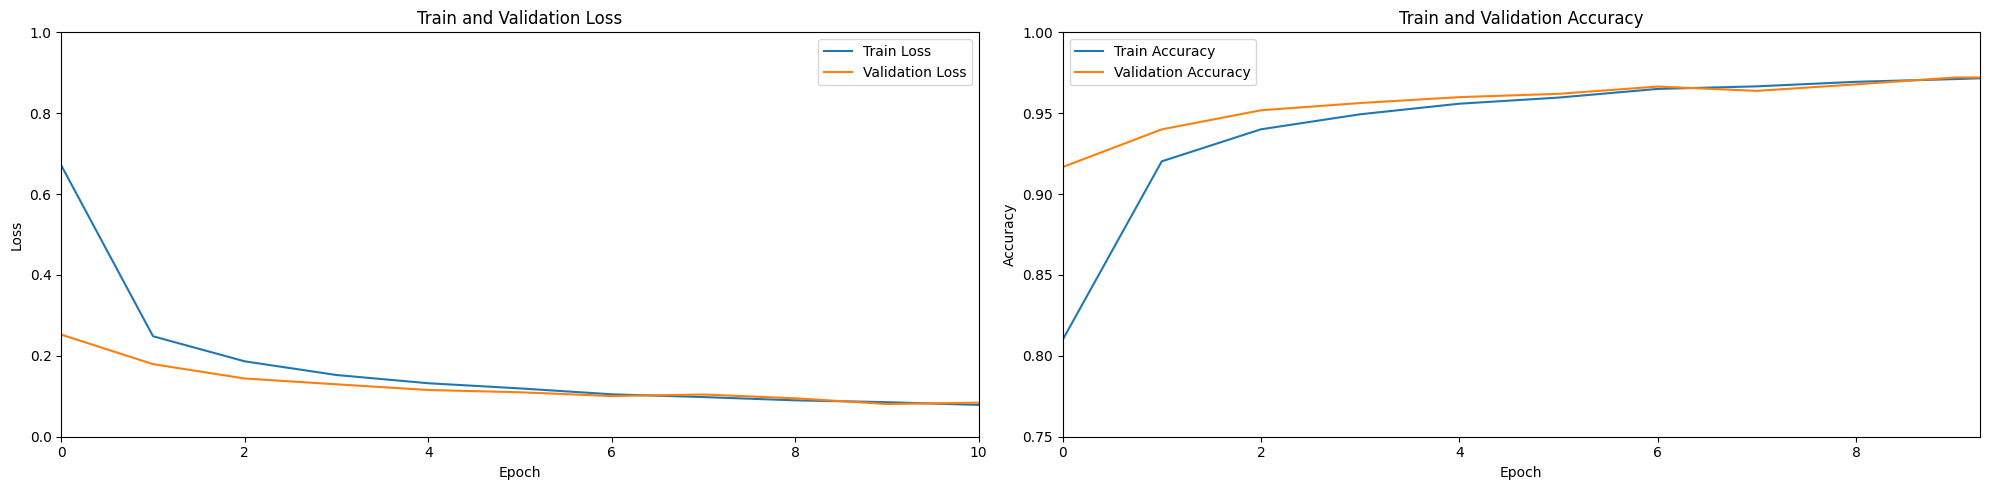

In [60]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

# Save the figures
plt.savefig('train_val_loss_accuracy.png')


In [53]:


# Get train accuracy
#train_loss, train_accuracy = model.evaluate(train_gen)
print(f"Train Accuracy: {train_accuracy}")

# Get test accuracy
#test_loss, test_accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {test_accuracy}")

# Get predictions for precision and recall calculation
#y_true = test_gen.classes
#y_pred = model.predict(test_gen)
#y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision and recall scores
precision = precision_score(labels, predictions, average='micro')
recall = recall_score(labels, predictions, average='micro')

print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")


Train Accuracy: 0.989131510257721
Test Accuracy: 0.974220335483551
Precision Score: 0.9739927156840428
Recall Score: 0.9739927156840428


In [55]:
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Precision Score: {precision*100:.2f}%")
print(f"Recall Score: {recall*100:.2f}%")


Train Accuracy: 98.91%
Test Accuracy: 97.42%
Precision Score: 97.40%
Recall Score: 97.40%


<Figure size 2000x500 with 0 Axes>

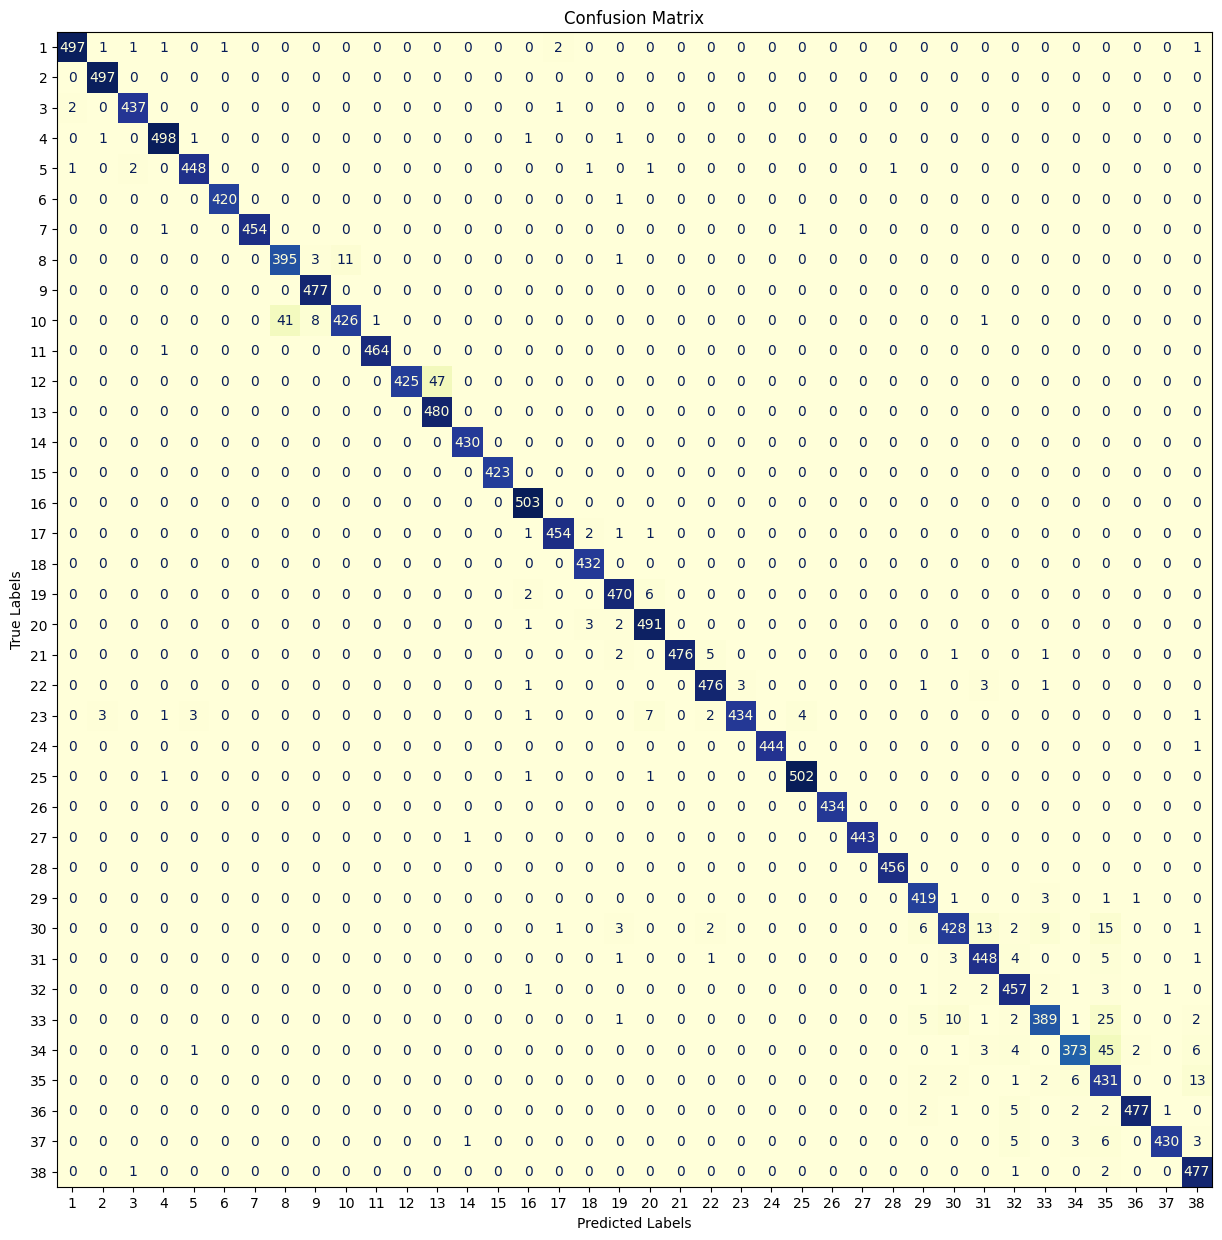

In [59]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix.png')
plt.show()